# Simulasi dan Analisis Sinyal PPG serta Aplikasi Bandpass Filter pada Sinyal Audio

122140093 - Chandra Budi Wijaya

## Soal 1: Simulasi PPG

**Parameter:**
- Durasi: 93 detik (3 digit terakhir NIM: 093)
- Sampling Rate: 150 Hz
- Noise Level: 0.93
- Heart Rate: 80 BPM
- Random State: 40131 (dari tanggal lahir 040131)

### Pendahuluan
Pada tugas ini, kita akan melakukan simulasi sinyal PPG, melakukan downsampling, menerapkan filter, dan memproses file audio menggunakan filter bandpass. Semua proses akan dijelaskan langkah demi langkah.

## IMPORT LIBRARY

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
from scipy import signal
from scipy.signal import resample, butter, freqz
from scipy.io import wavfile
import os

*Simulasi Sinyal PPG Awal:*

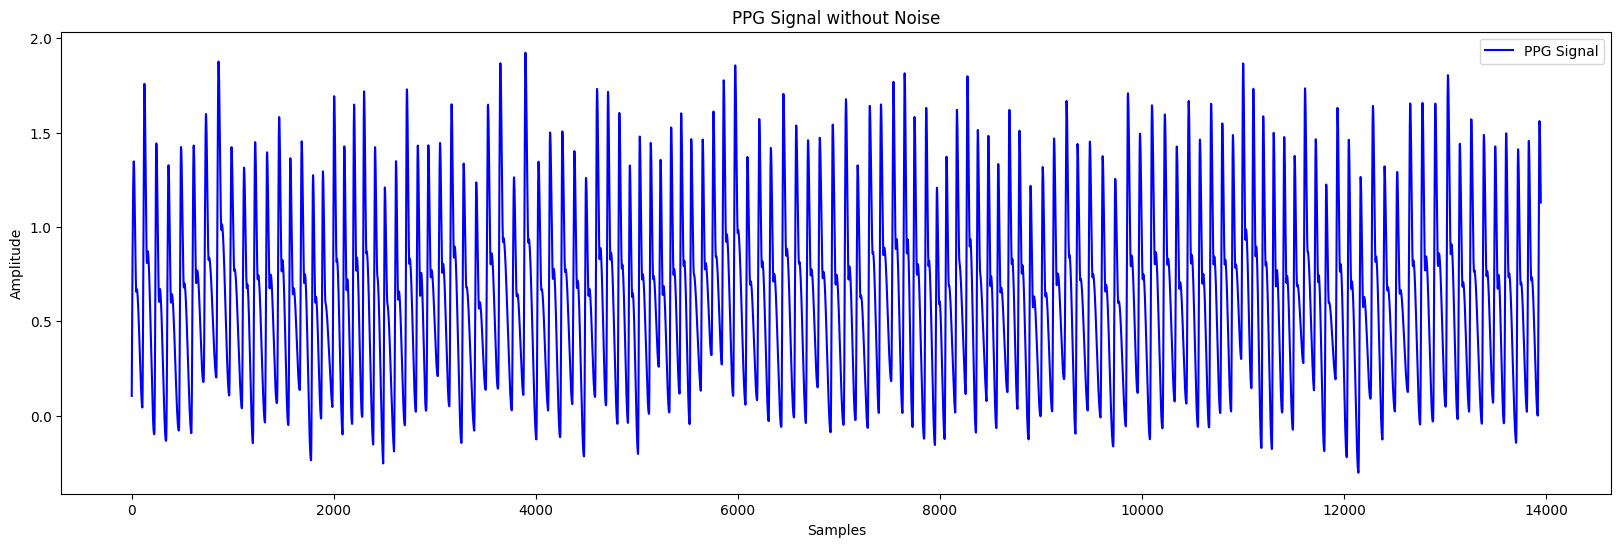

In [14]:
# Parameter simulasi
duration = 93  # 3 digit terakhir NIM
sampling_rate = 150
heart_rate = 80

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=heart_rate)

plt.figure(figsize=(20,6))
plt.plot(ppg_signal, label="PPG Signal", color="blue")
plt.title("PPG Signal without Noise")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


*Menambahkan Noise ke PPG:*

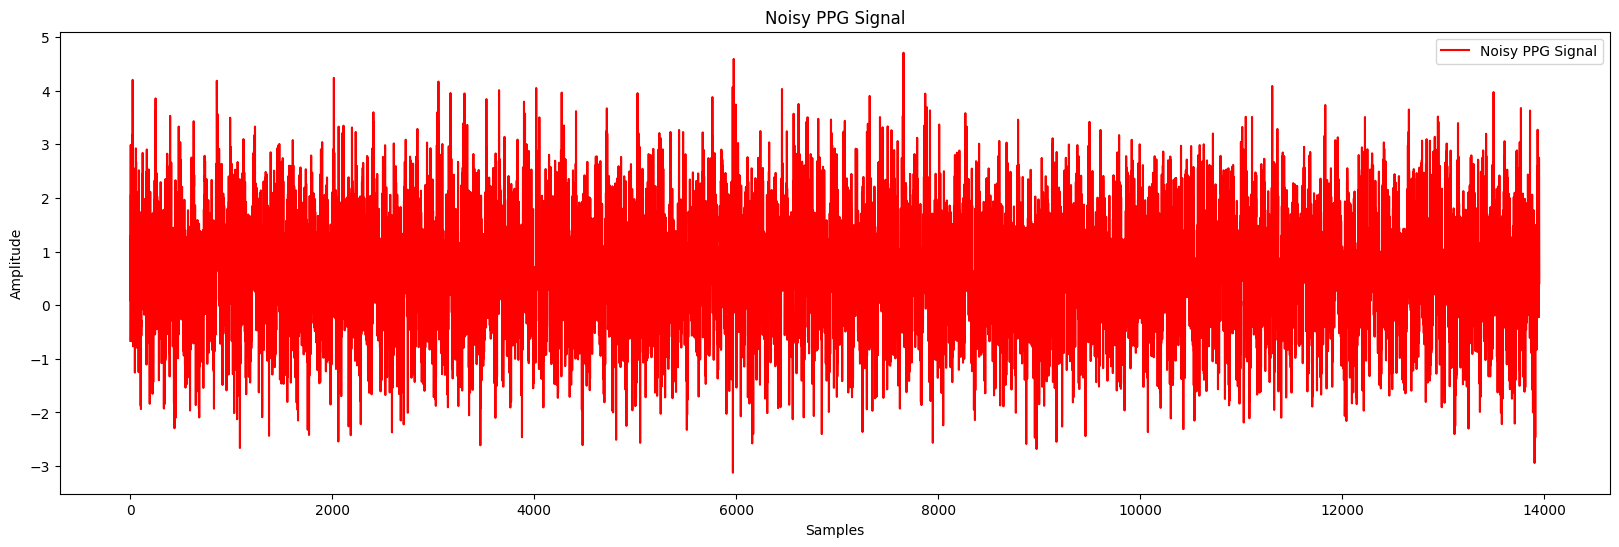

In [15]:
# Menambahkan noise
noise_level = 0.93
np.random.seed(40131)
noise = noise_level * np.random.randn(len(ppg_signal))
ppg_signal_noisy = ppg_signal + noise

plt.figure(figsize=(20,6))
plt.plot(ppg_signal_noisy, label="Noisy PPG Signal", color="red")
plt.title("Noisy PPG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


## Downsampling Sinyal PPG
Kita akan melakukan downsampling ke beberapa nilai sampling rate: 100 Hz, 50 Hz, 25 Hz, 10 Hz, dan 5 Hz.

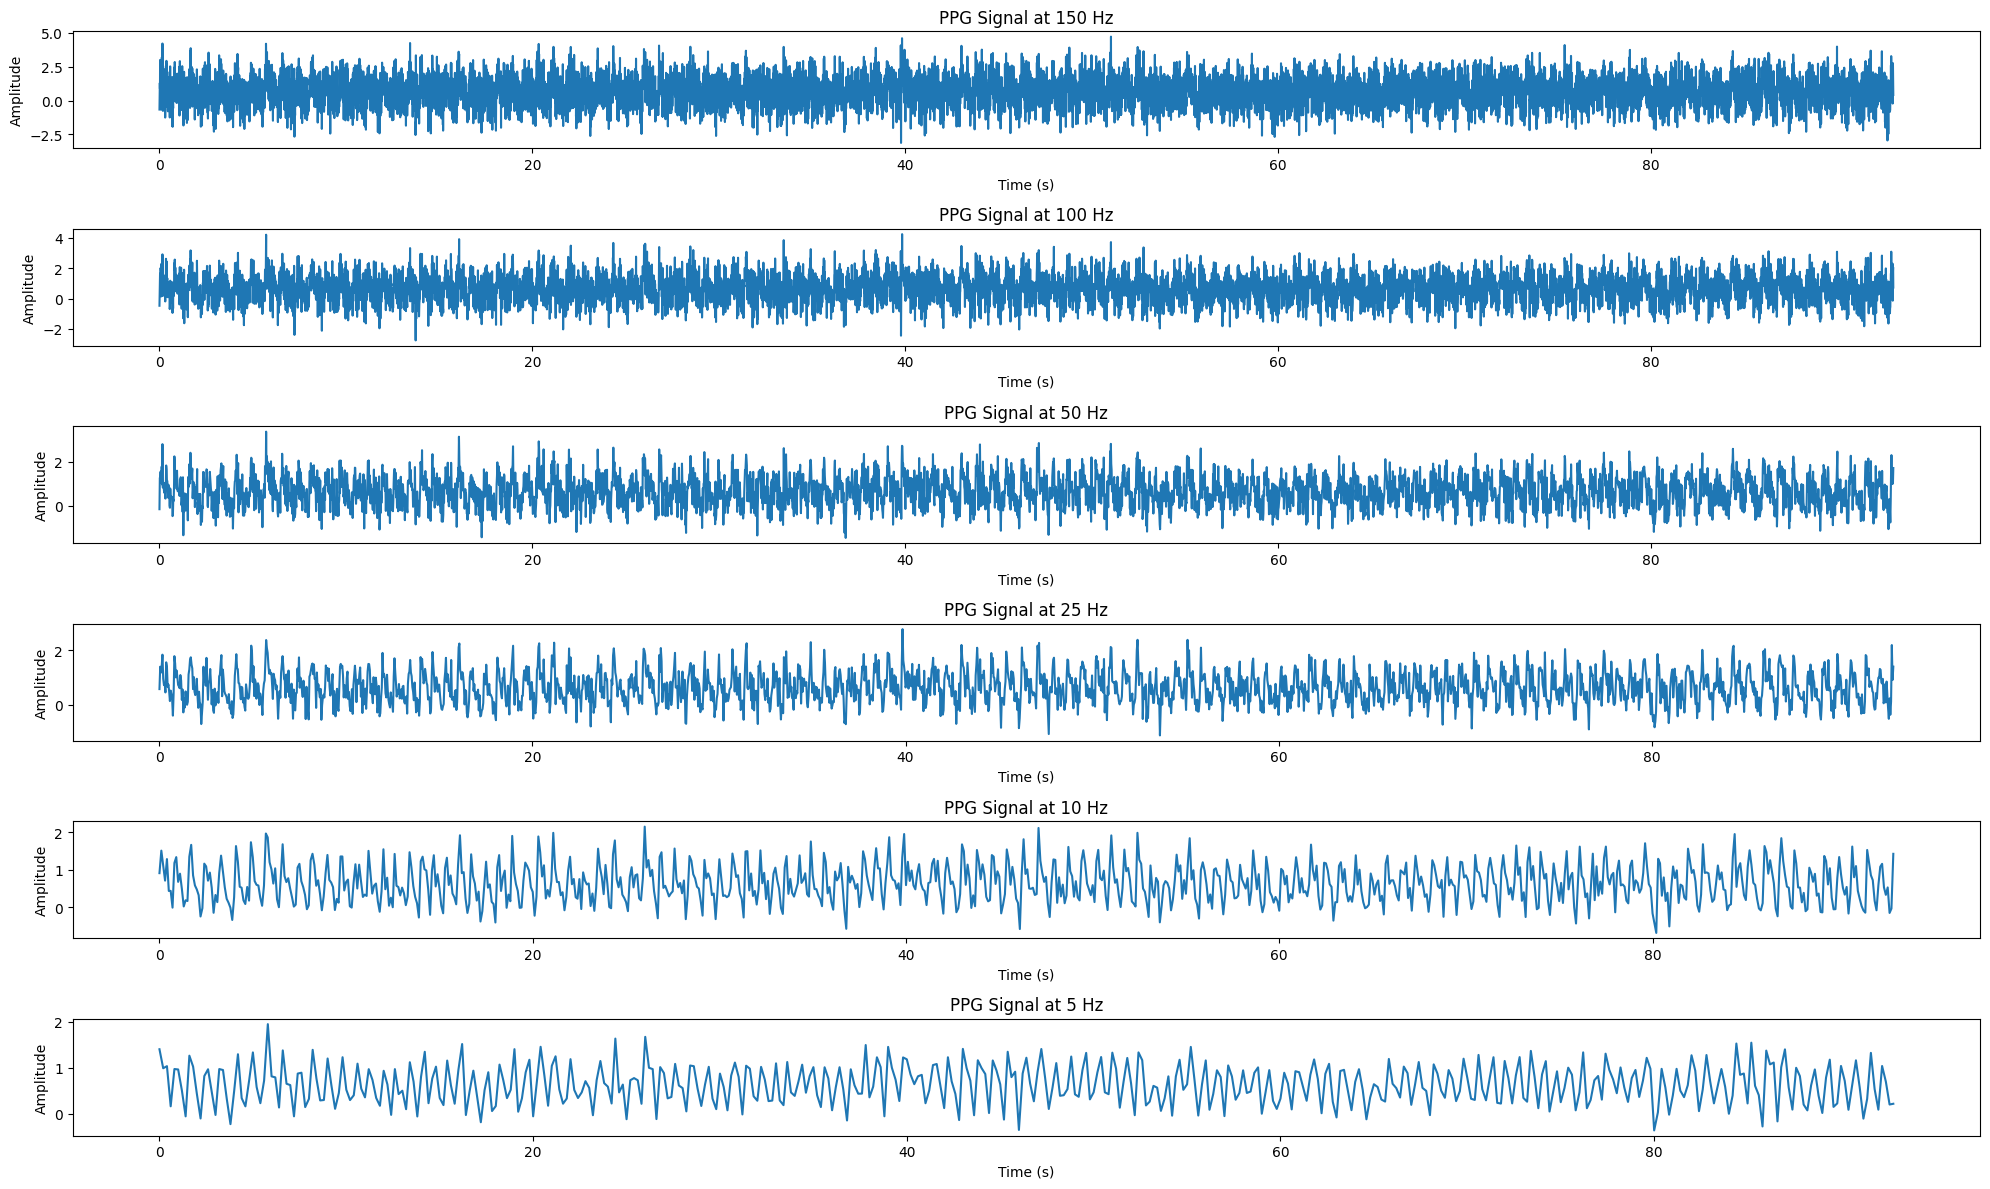

In [16]:
fs_list = [150, 100, 50, 25, 10, 5]
signals = [ppg_signal_noisy]
length = len(ppg_signal_noisy)

for i in range(1, len(fs_list)):
    n_samples = int(length * fs_list[i] / fs_list[0])
    downsampled = resample(signals[-1], n_samples)
    signals.append(downsampled)
    
plt.figure(figsize=(20, 12))
for i, fs in enumerate(fs_list):
    plt.subplot(len(fs_list), 1, i+1)
    t = np.arange(len(signals[i])) / fs
    plt.plot(t, signals[i])
    plt.title(f'PPG Signal at {fs} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
plt.show()

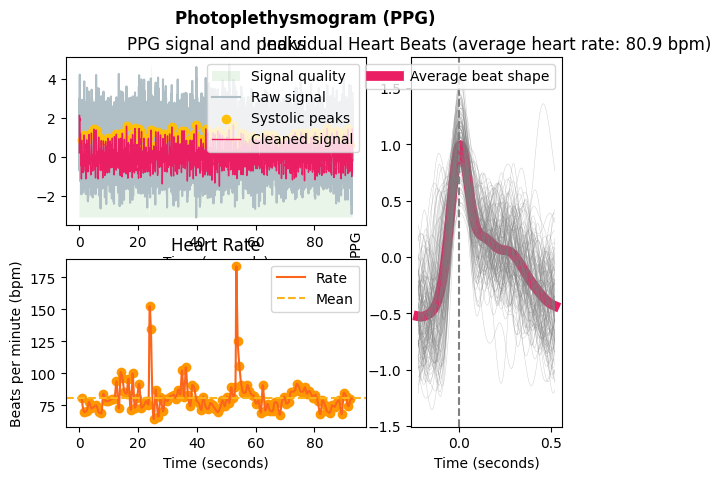

In [17]:
# Proses sinyal PPG yang sudah ada
signals, info = nk.ppg_process(ppg_signal_noisy, sampling_rate=150)

# Plot hasil proses PPG
nk.ppg_plot(signals, info)


## A. Pembuktian Downsampling

### Definisi Sampling

Sampling adalah proses mengubah sinyal analog menjadi sinyal digital dengan cara mengambil nilai-nilai sinyal pada interval waktu tertentu.  
Tujuannya adalah merepresentasikan sinyal kontinu dalam bentuk diskrit.  
Kumpulan nilai yang diambil melalui proses ini akan membentuk representasi digital dari sinyal asli.

---

### Teorema Nyquist-Shannon

Menurut Teorema Nyquist-Shannon, agar sinyal dapat direkonstruksi dengan akurat tanpa kehilangan informasi, frekuensi sampling harus **minimal dua kali** frekuensi tertinggi dari sinyal yang akan disampling.

Semakin tinggi nilai sampling rate, sinyal digital yang dihasilkan akan semakin menyerupai sinyal analog aslinya.  
Sebaliknya, jika sampling rate terlalu rendah, maka informasi penting dari sinyal dapat hilang, mengakibatkan terjadinya kesalahan rekonstruksi yang disebut **aliasing**.

---

### Penjelasan Aliasing

Aliasing adalah fenomena di mana sinyal hasil sampling tampak memiliki frekuensi yang salah (biasanya lebih rendah dari frekuensi aslinya).  
Fenomena ini terjadi karena sampling rate yang digunakan tidak cukup tinggi untuk menangkap perubahan cepat pada sinyal, sehingga bentuk sinyal yang diperoleh menjadi tidak representatif terhadap sinyal asli.

---

### Keterkaitan dengan Percobaan

Dalam konteks percobaan ini, terdapat dua metode manipulasi sampling:
- **Upsampling**: Meningkatkan sampling rate untuk meningkatkan resolusi sinyal digital, tetapi memerlukan sumber daya komputasi yang lebih besar.
- **Downsampling**: Menurunkan sampling rate untuk mempercepat pemrosesan, namun berisiko kehilangan detail penting dari sinyal asli.

---

### Parameter Simulasi Sinyal

Pada percobaan ini, sinyal PPG disimulasikan dengan parameter sebagai berikut:
- **Durasi:** 93 detik
- **Sampling Rate awal:** 150 Hz
- **Noise Level:** 0.93
- **Heart Rate:** 80 BPM
- **Random State:** 40131 (berdasarkan tanggal lahir 04/01/31)

Selanjutnya, dilakukan proses **downsampling** dengan mengubah sampling rate dari **150 Hz** menjadi **100 Hz**, **50 Hz**, **25 Hz**, **10 Hz**, dan **5 Hz**.

---

### Rumus Menghitung Jumlah Sampling

Jumlah sampling dihitung menggunakan rumus:

\[
\text{Jumlah Sampling} = \text{Durasi (detik)} \times \text{Sampling Rate (Hz)}
\]

Maka, hasil perhitungan jumlah sampel pada masing-masing tingkat sampling adalah:

- Pada fs = 150 Hz → Jumlah sampel = 93 × 150 = **13.950** sampel
- Pada fs = 100 Hz → Jumlah sampel = 93 × 100 = **9.300** sampel
- Pada fs = 50 Hz → Jumlah sampel = 93 × 50 = **4.650** sampel
- Pada fs = 25 Hz → Jumlah sampel = 93 × 25 = **2.325** sampel
- Pada fs = 10 Hz → Jumlah sampel = 93 × 10 = **930** sampel
- Pada fs = 5 Hz → Jumlah sampel = 93 × 5 = **465** sampel

---



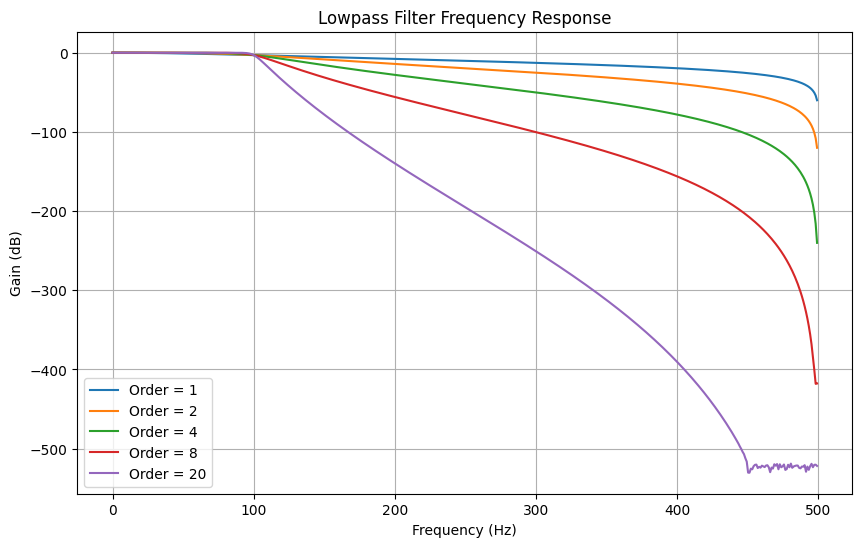

In [18]:
fs = 1000  # Sampling frequency
cutoff = 100  # Cutoff frequency
orders = [1, 2, 4, 8, 20]

plt.figure(figsize=(10, 6))
for order in orders:
    b, a = butter(order, cutoff, btype='low', fs=fs)
    w, h = freqz(b, a, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order = {order}')

plt.title('Lowpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True)
plt.legend()
plt.show()

Dengan mengubah order menjadi lebih tajam, filter akan menjadi lebih efektif dalam
memisahkan frekuensi yang diinginkan dan yang tidak diinginkan. Namun, penggunaan
order yang terlalu tinggi juga dapat menyebabkan terjadinya distorsi pada sinyal.

# Jawaban

## Point A

Berdasarkan hasil visualisasi downsampling yang telah saya lakukan, dapat dilihat perbedaan yang sangat signifikan pada waveform atau sinyal antara **150 Hz** dan **5 Hz**.  
Hal ini terjadi karena ketika sampling rate dikurangi, bentuk sinyal yang dihasilkan akan semakin kasar dan informasi yang ditangkap menjadi semakin sedikit. Akibatnya, hasil sinyal digital menjadi kurang akurat dibandingkan dengan sinyal aslinya.  
Kondisi ini membuktikan bahwa semakin kecil frekuensi sampling yang digunakan, maka akan menyebabkan sinyal mengalami distorsi dan kehilangan informasi penting yang terkandung di dalamnya.

Selain mengurangi informasi asli pada sinyal, downsampling ini juga menyebabkan terjadinya fenomena **aliasing**.  
Apa itu aliasing? `Aliasing` merupakan fenomena di mana sinyal frekuensi tinggi terlihat seperti sinyal dengan frekuensi lebih rendah. Fenomena ini muncul akibat penggunaan sampling rate yang terlalu rendah untuk merepresentasikan sinyal.  
Idealnya, untuk menghindari terjadinya aliasing, kita harus menerapkan prinsip `Nyquist Rate`, yaitu menggunakan frekuensi sampling minimal dua kali lipat dari frekuensi tertinggi pada sinyal.

## Point B

`Order` dalam parameter ketika melakukan filtering merupakan sebuah nilai yang menentukan tingkat kemiringan (*steepness*) dari filter.  
Semakin tinggi nilai `order`, maka semakin tajam transisi antara `passband` dan `stopband`, sehingga filter menjadi lebih selektif dalam melewatkan atau menghilangkan frekuensi tertentu.

Namun demikian, penggunaan `order` yang terlalu tinggi juga harus diperhatikan karena dapat menimbulkan efek samping seperti distorsi atau ketidakstabilan sinyal hasil filter.  
Berikut ini merupakan visualisasi bagaimana perubahan nilai `order` akan mempengaruhi karakteristik respon frekuensi pada filter.

---


### 2. Filtering Band-Pass menggunakan Signal Butter

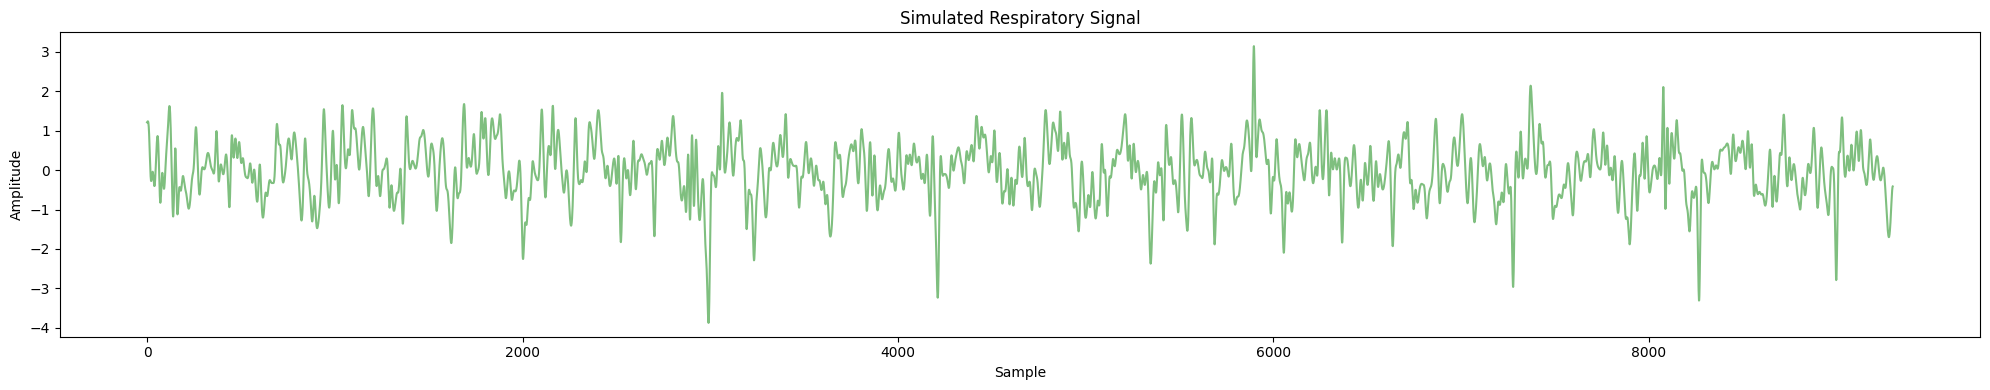

In [19]:
#Sinyal pernapasan Asli menggunakan NeuroKit2
from scipy import signal
import neurokit2 as nk 
import matplotlib.pyplot as plt

resp_signal = nk.rsp_simulate(duration=93, sampling_rate=100, respiratory_rate=18, noise=0.93, random_state=40131)

#plot hasil simulasi sinyal pernapasan
plt.figure(figsize=(20, 4))
plt.plot(resp_signal, color="green", alpha=0.5)
plt.title("Simulated Respiratory Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

**Visualisasi Perbedaan Filter Order:**

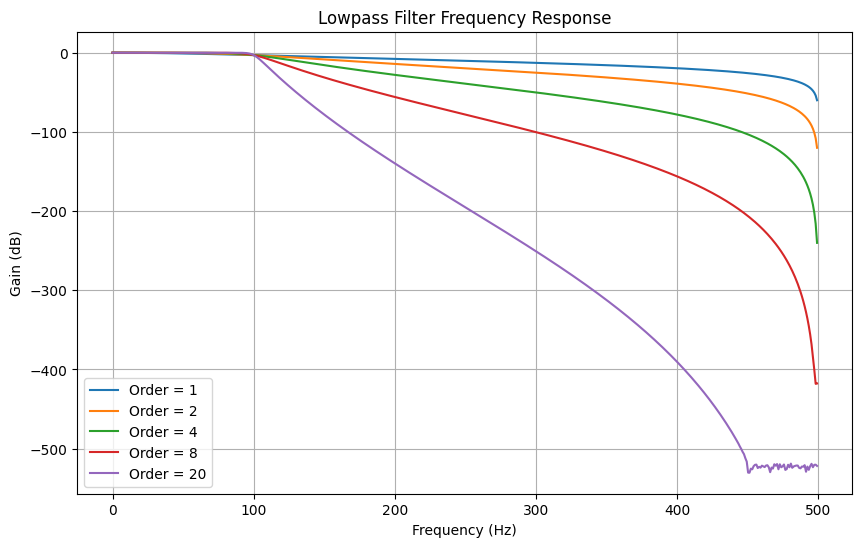

In [20]:

from scipy.signal import butter, freqz

fs = 1000
cutoff = 100
orders = [1, 2, 4, 8, 20]

plt.figure(figsize=(10, 6))
for order in orders:
    b, a = butter(order, cutoff, btype='low', fs=fs)
    w, h = freqz(b, a, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)), label=f'Order = {order}')

plt.title('Lowpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True)
plt.legend()
plt.show()


**Simulasi dan Bandpass Filter Sinyal Respirasi:**

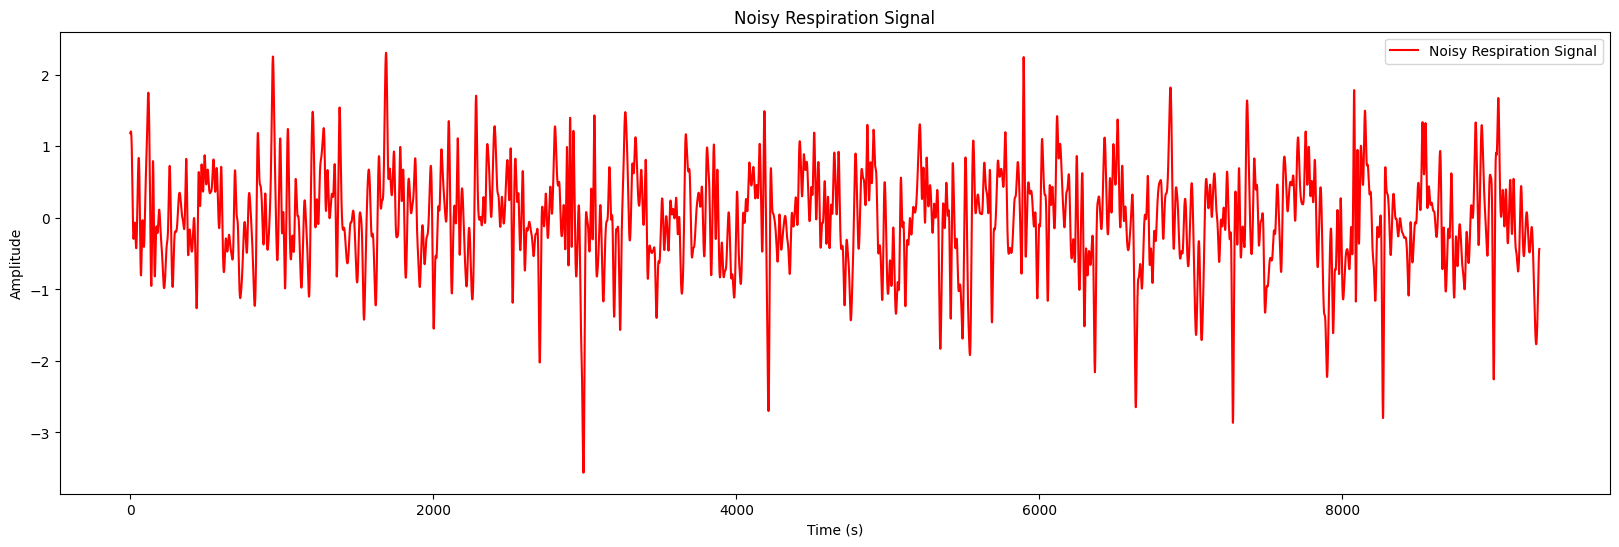

In [21]:

# Simulasi sinyal respirasi
sampling_rate = 100
data = nk.rsp_simulate(duration=93, sampling_rate=sampling_rate, noise=0.93, random_state=40131)

plt.figure(figsize=(20, 6))
plt.plot(data, color="red", label="Noisy Respiration Signal")
plt.title("Noisy Respiration Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


**Fungsi Bandpass Filter dan Aplikasinya:**

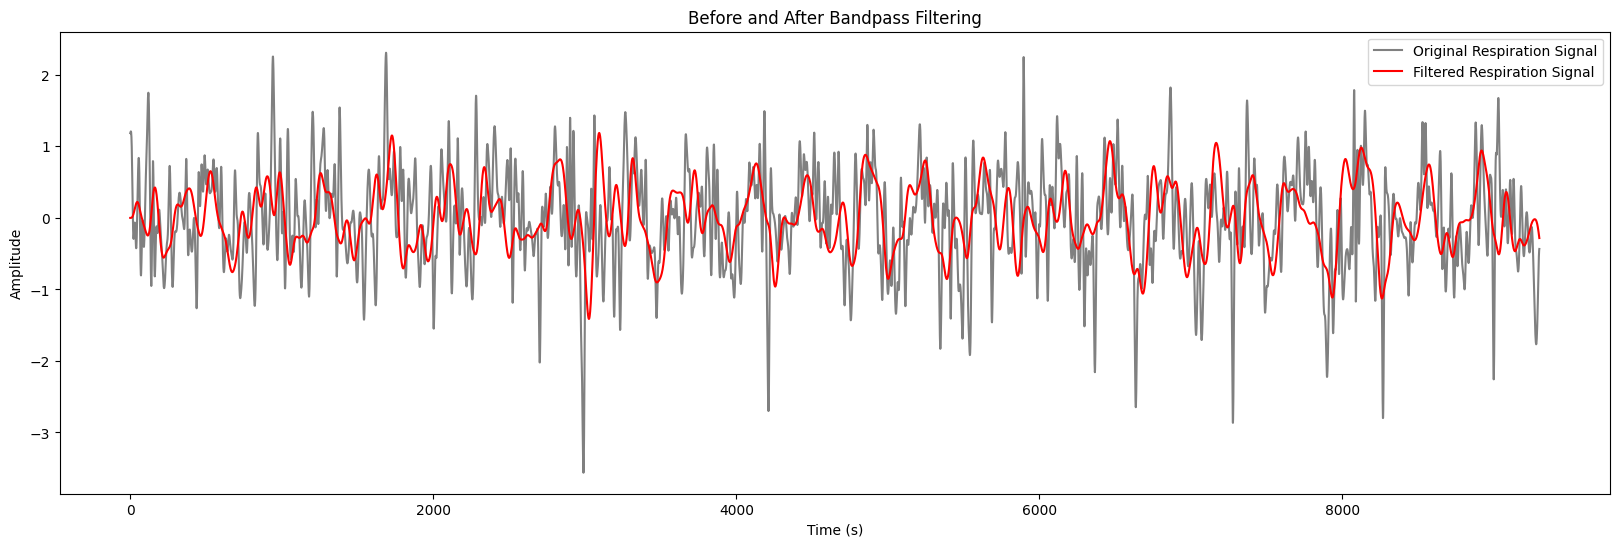

In [22]:
from scipy import signal

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.lfilter(b, a, data)
    return y

filtered_signal = bandpass_filter(data, 0.1, 1, fs=sampling_rate, order=4)

plt.figure(figsize=(20, 6))
plt.plot(data, color="grey", label="Original Respiration Signal")
plt.plot(filtered_signal, color="red", label="Filtered Respiration Signal")
plt.title("Before and After Bandpass Filtering")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


## Jawaban Soal 2

Pada percobaan ini, kita melakukan simulasi sinyal respirasi menggunakan modul **Neurokit2** dengan parameter:
- **Durasi:** 93 detik (berdasarkan 3 digit terakhir NIM: 093)
- **Sampling Rate:** 100 Hz
- **Noise Level:** 0.93 (dari 2 digit terakhir NIM: 93)
- **Respiratory Rate:** 18 breaths per minute (BPM)
- **Random State:** 40131 (berdasarkan tanggal lahir 04/01/31)

Visualisasi hasil simulasi sinyal respirasi tanpa filtering ditampilkan pada grafik di mana sinyal tampak fluktuatif akibat adanya noise tambahan. Ini menggambarkan kondisi respirasi manusia nyata yang terkontaminasi oleh noise lingkungan.

---

Dalam proses filtering, kita menggunakan pendekatan **bandpass filter** berbasis **filter Butterworth**.  
Pada filtering sinyal, terdapat tiga jenis filter umum:
- **Lowpass filter:** mengizinkan sinyal frekuensi rendah dan memblokir frekuensi tinggi.
- **Highpass filter:** mengizinkan sinyal frekuensi tinggi dan memblokir frekuensi rendah.
- **Bandpass filter:** mengizinkan sinyal pada rentang frekuensi tertentu, dengan parameter *lowcut* dan *highcut*.

---

Pada percobaan ini, dilakukan **bandpass filtering** terhadap sinyal respirasi dengan ketentuan:
- **Lowcut:** 0.1 Hz  
- **Highcut:** 1 Hz  
- **Order:** 4

---

### Alasan Pemilihan Rentang 0.1–1 Hz

Menurut referensi dari website Halodoc, frekuensi pernapasan normal manusia dewasa berkisar antara **12–20 napas per menit**, yang ekuivalen dengan **0.2–0.33 Hz**.  
Namun, dalam percobaan ini, filter tidak dipasang ketat hanya pada 0.2–0.33 Hz. Sebaliknya, **lowcut 0.1 Hz** dan **highcut 1 Hz** digunakan sebagai **buffer** untuk mengakomodasi variasi pernapasan alami manusia.

Hal ini penting karena:
- Variasi pernapasan alami bisa terjadi lebih rendah dari 0.2 Hz atau lebih tinggi dari 0.33 Hz.
- Penerapan margin frekuensi lebih lebar membantu menangkap keseluruhan sinyal respirasi tanpa kehilangan informasi penting akibat filtering terlalu sempit.

---

### Hasil Filtering

Setelah penerapan **bandpass filter**, diperoleh dua visualisasi:
- **Sinyal respirasi asli** (warna abu-abu)
- **Sinyal respirasi setelah filtering** (warna merah)

Dari hasil tersebut, dapat diamati bahwa sinyal respirasi yang telah difilter menjadi lebih bersih dan lebih fokus pada rentang frekuensi respirasi manusia.  
Gangguan noise di frekuensi rendah dan tinggi berhasil diminimalkan tanpa mengubah pola dasar sinyal respirasi.

---

### Catatan Mengenai Order Filter

Visualisasi tambahan pada percobaan juga memperlihatkan bagaimana **perbedaan nilai order** pada filter lowpass mempengaruhi karakteristik filter:
- Semakin tinggi nilai `order`, semakin tajam transisi antara frekuensi yang di-pass dan di-reject.
- Order yang terlalu tinggi dapat menyebabkan efek samping seperti ringing atau distorsi, sehingga pemilihan order yang moderat (seperti order 4 pada percobaan ini) menjadi pilihan yang baik untuk respirasi signal.

---



## Soal 3: Penerapan Band Pass Filter

Pada soal ini, saya merekam suara yang didalamnya memiliki noise yaitu suara kipas
angin. Pada percobaan kali ini, saya akan melakukan eksperimen dengan menggunakan
band-pass filter untuk membuang / cutoff noise yang ada pada audio yang saya miliki.

In [23]:
import os
from scipy.io import wavfile

sound_path = os.path.join(os.getcwd(), 'c:\\CHANDRA\\KULIAH\\SMS 6\\DSP\\ho2', 'sound_chandra.wav')
sampling_rate, audio_data = wavfile.read(sound_path)

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Number of Channels: {1 if len(audio_data.shape)==1 else audio_data.shape[1]}")

Sampling Rate: 48000 Hz
Number of Channels: 1


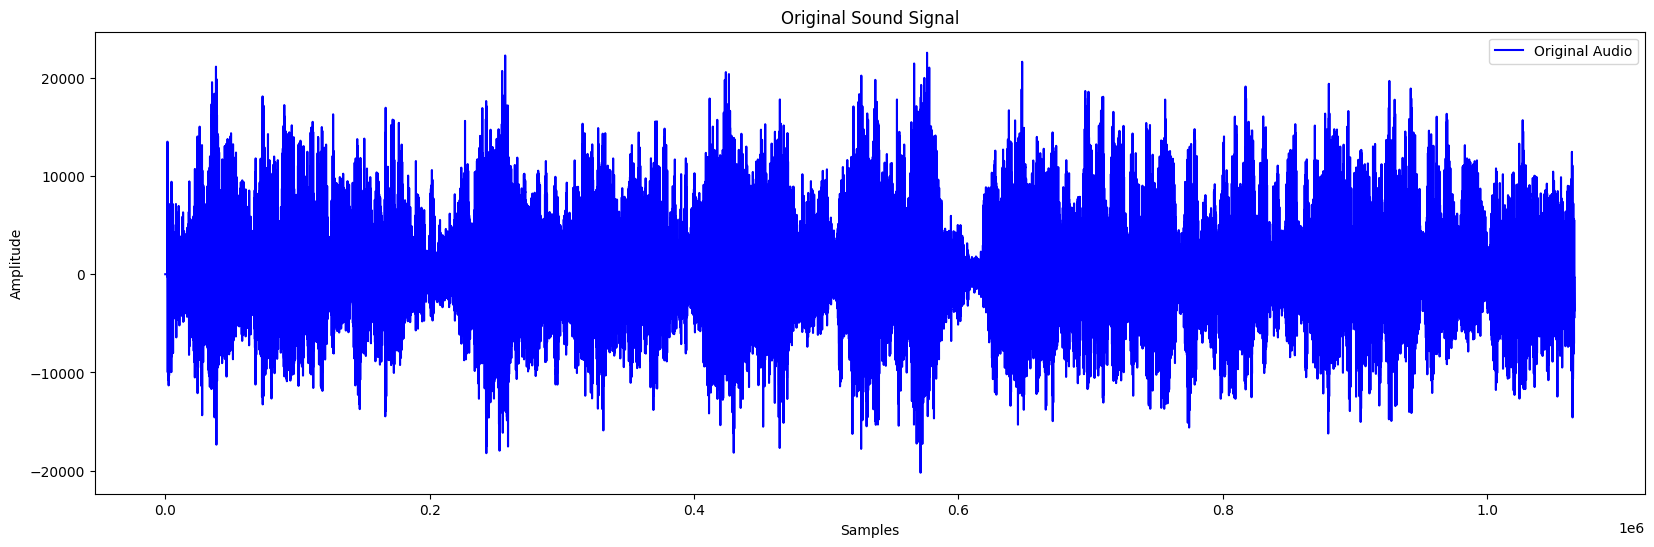

c:\Users\LENOVO\anaconda3\envs\praktik_dsp\lib\site-packages\matplotlib\axes\_axes.py:8264: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


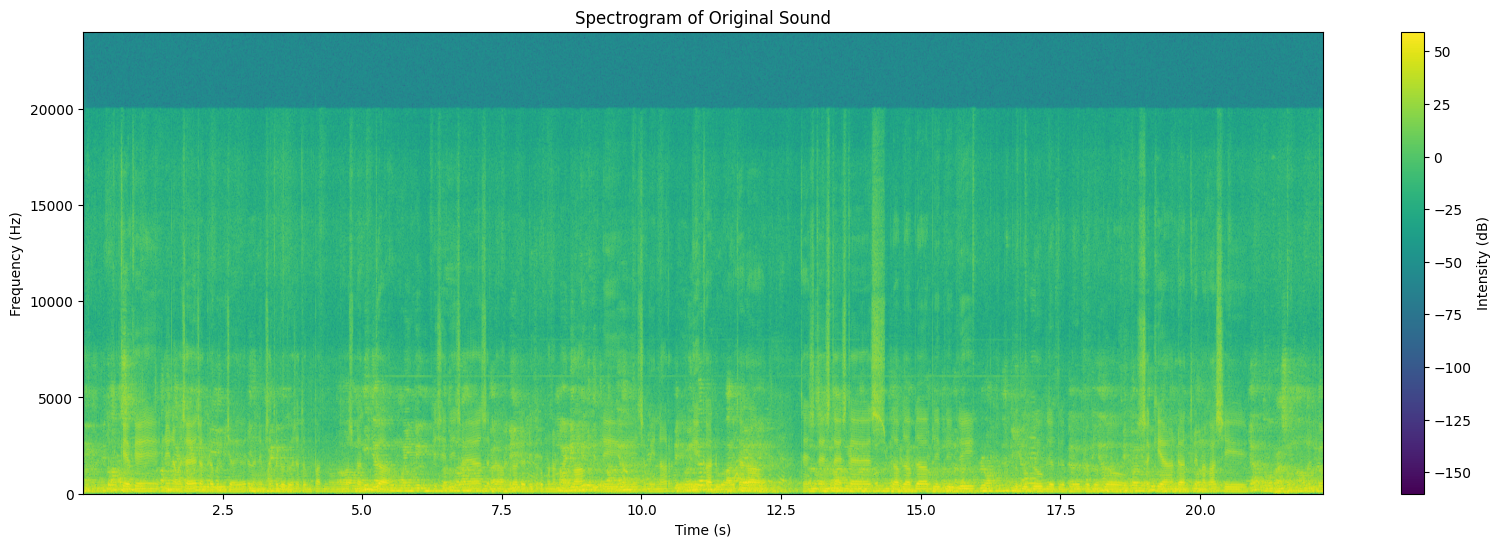

In [24]:

# Visualisasi awal audio
plt.figure(figsize=(20, 6))
plt.plot(audio_data, color="blue", label="Original Audio")
plt.title("Original Sound Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.specgram(audio_data, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='viridis')
plt.title("Spectrogram of Original Sound")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.show()


In [25]:

# Filtering Audio
filtered_audio = bandpass_filter(audio_data, 1000, 6500, fs=sampling_rate, order=4)

# Save filtered audio
output_path = os.path.join(os.getcwd(), 'c:\\CHANDRA\\KULIAH\\SMS 6\\DSP\\ho2', 'Filtered_Sound_chandra.wav')
wavfile.write(output_path, sampling_rate, filtered_audio.astype(np.int16))


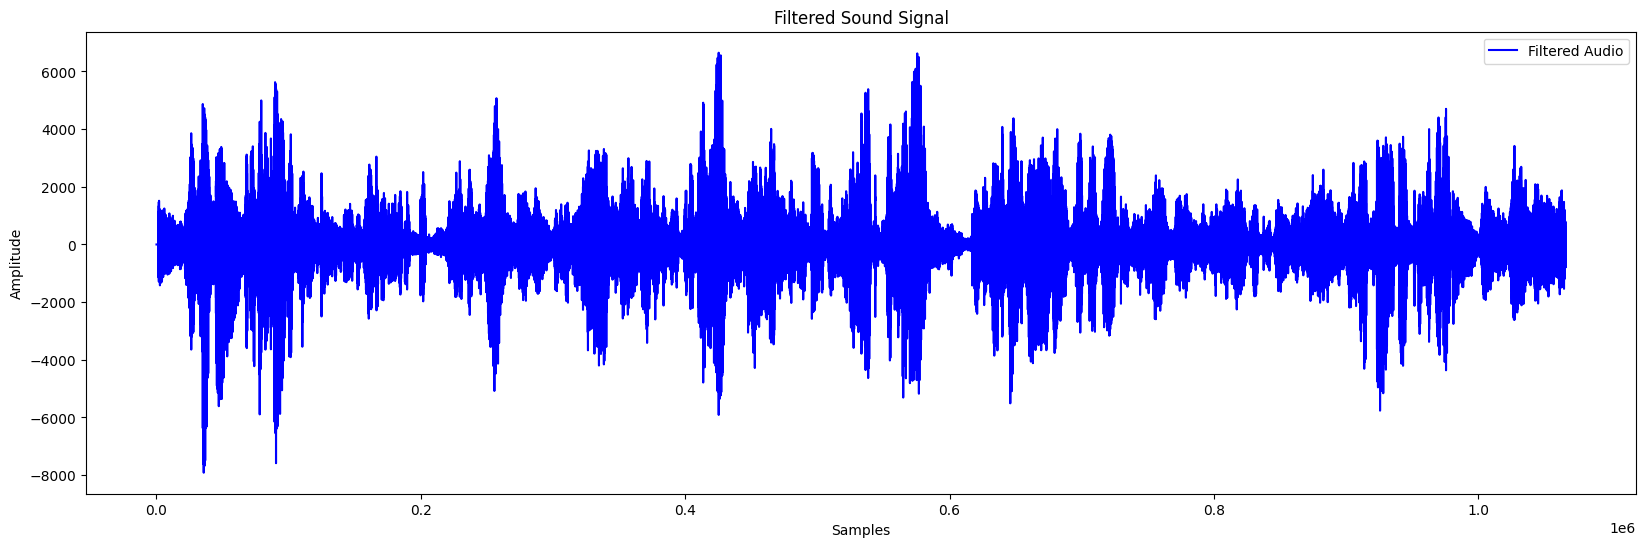

In [26]:

# Plot hasil filtering
plt.figure(figsize=(20, 6))
plt.plot(filtered_audio, color="blue", label="Filtered Audio")
plt.title("Filtered Sound Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


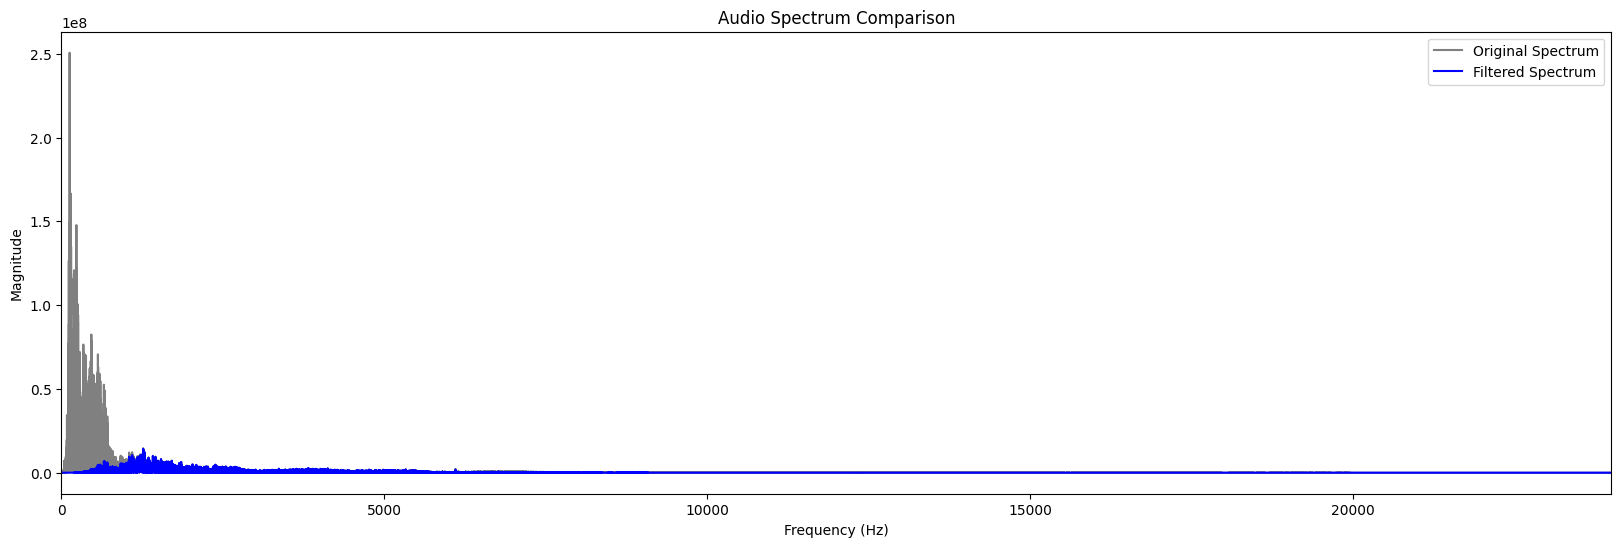

In [27]:

# Perbandingan Spektrum
fft_orig = np.abs(np.fft.rfft(audio_data))
fft_filt = np.abs(np.fft.rfft(filtered_audio))
freqs = np.fft.rfftfreq(len(audio_data), d=1/sampling_rate)

plt.figure(figsize=(20, 6))
plt.plot(freqs, fft_orig, color="gray", label="Original Spectrum")
plt.plot(freqs, fft_filt, color="blue", label="Filtered Spectrum")
plt.title("Audio Spectrum Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.xlim(0, sampling_rate/2)
plt.show()


## Deskripsi Gambar Proses Pengerjaan Band-Pass Filter

Pada percobaan kali ini, saya melakukan beberapa eksperimen menggunakan band-pass filter untuk menghilangkan noise pada audio saya. Noise tersebut berasal dari kipas angin. Saya mencoba berbagai nilai cutoff frequency, yaitu untuk low-cut pada 10, 100, 150, 250, 300, 500, 750, 1000, 1500, dan 3000 Hz, serta untuk high-cut pada 2000, 3000, 4000, 4500, 5000, 6000, 6500, 7000, 10000, dan 15000 Hz. Dari seluruh percobaan tersebut, saya mendapatkan referensi rentang frekuensi cutoff untuk noise kipas angin, yaitu antara 80–150 Hz untuk low-cut dan 3000–6000 Hz untuk high-cut. Namun, setelah mencoba menggunakan rentang frekuensi tersebut, suara yang dihasilkan masih memiliki noise yang sama seperti audio asli (original). Hal ini kemungkinan disebabkan oleh kualitas audio yang direkam, karena setiap audio memiliki karakteristik dan kualitas yang berbeda sehingga memerlukan penyesuaian filter lebih lanjut. Hal ini berbeda dengan perekaman audio profesional yang menggunakan perangkat sesuai standar internasional. Setelah mencoba berbagai kombinasi low-cut dan high-cut, saya memutuskan menggunakan cutoff frequency pada angka 1000 Hz untuk low-cut dan 6500 Hz untuk high-cut. Pemilihan ini dikarenakan pada frekuensi cutoff 1000 Hz (low), suara noise dari kipas angin dapat terbuang dengan baik, sementara cutoff pada 6500 Hz (high) masih mempertahankan suara utama. Namun, karakter suara menjadi terdengar agak tipis dan seperti menggunakan efek radio.


___
$$ Referensi/Lampiran $$

- Sound:    https://drive.google.com/drive/folders/1JIggY0kyels2kClhoUOvVI2zOg1uudLc?usp=sharing
- GROK 1:   https://grok.com/share/c2hhcmQtMg%3D%3D_dd033ebc-868c-4530-ae02-acb782fb1857
- GROK 2:   https://grok.com/share/c2hhcmQtMg%3D%3D_8eb423f5-64b4-4978-b882-eec6734b8f4a